In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import eig

In [22]:
b=np.array([0.2,18.8,71.0,98.0,100.3,52.3,11.6,0.9])/1000*0.508


In [3]:
df=pd.read_excel("Table18.xlsx")

In [17]:
m=df.iloc[2:102,1].to_numpy()

In [88]:
L=np.zeros((100,100))
k=0
for i in np.arange(10,50,5):
    for j in np.arange(i,i+5):
        L[0][j]=b[k]
    k+=1
for l in np.arange(0,99):
    L[l+1][l]=1-m[l]

In [84]:
e_val,e_vec=eig(L)

In [121]:
max(e_val)

(0.9956059820629688+0j)

In [117]:
N_0=np.array([np.zeros(100)])
for i in np.arange(19):
    N_0[0][i]=75887400/19
for i in np.arange(19,26):
    N_0[0][i]=27366000/7
for i in np.arange(26,35):
    N_0[0][i]=39656400/9
for i in np.arange(35,55):
    N_0[0][i]=83093900/20
for i in np.arange(55,65):
    N_0[0][i]=42413200/10
for i in np.arange(65,100):
    N_0[0][i]=54798900/35
N_0=N_0.transpose()
Pop=pd.DataFrame({"Year":[],"Total":[],"College":[],"65_plus":[]})
for i in np.arange(101):
    if i>0:
        N_0=np.matmul(L,N_0)
        
    x={"Year":i,"Total":np.sum(N_0),"College":np.sum(N_0[17:26]),"65_plus":np.sum(N_0[65:])}
    Pop=Pop.append(x,ignore_index=True)

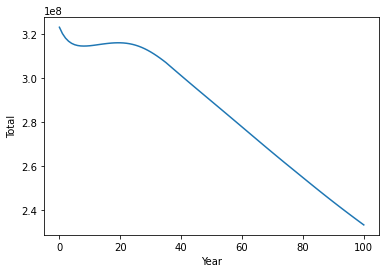

In [125]:
sns.lineplot(data=Pop,x="Year",y="Total")
plt.savefig("Total vs Time")

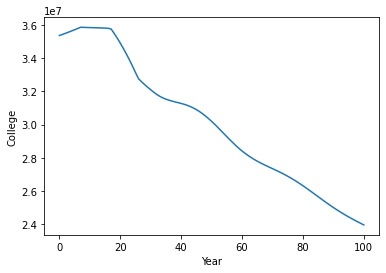

In [126]:
sns.lineplot(data=Pop,x="Year",y="College")
plt.savefig("College vs Time")

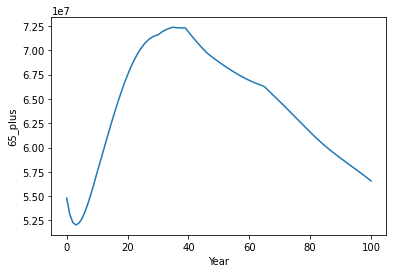

In [127]:
sns.lineplot(data=Pop,x="Year",y="65_plus")
plt.savefig("65+ vs Time")